In [ ]:
# Installing Libraries

!pip install tensorflow matplotlib scikit-learn seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Children Emotions'

Mounted at /content/drive


In [ ]:
# Importing Libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import os

In [ ]:
# Splitting Dataset

batch_size = 32
img_size = (224, 224)

# Load training and validation sets
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)

# Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 833 files belonging to 2 classes.
Using 667 files for training.
Found 833 files belonging to 2 classes.
Using 166 files for validation.


In [ ]:
# Building Base Model

def build_model(base_model):
    base_model.trainable = False
    model = models.Sequential([
        tf.keras.layers.Rescaling(1./255),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
# Training Model

from tensorflow.keras.applications import VGG16, DenseNet121, MobileNetV2, Xception, ResNet50

backbones = {
    'VGG16': VGG16(include_top=False, weights='imagenet', input_shape=img_size + (3,)),
    'DenseNet': DenseNet121(include_top=False, weights='imagenet', input_shape=img_size + (3,)),
    'MobileNet': MobileNetV2(include_top=False, weights='imagenet', input_shape=img_size + (3,)),
    'Xception': Xception(include_top=False, weights='imagenet', input_shape=img_size + (3,)),
    'ResNet': ResNet50(include_top=False, weights='imagenet', input_shape=img_size + (3,))
}

histories = {}
models_dict = {}

for name, base in backbones.items():
    print(f"Training {name}...")
    model = build_model(base)
    history = model.fit(train_ds, validation_data=val_ds, epochs=10)
    histories[name] = history
    models_dict[name] = model


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training VGG16...
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 651s 28s/step - accuracy: 0.8422 - loss: 0.4237 - val_accuracy: 0.8976 - val_loss: 0.3332
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 543s 26s/step - accuracy: 0.8994 - loss: 0.3363 - val_accuracy: 0.8976 - val_loss: 0.3474
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 536s 26s/step - accuracy: 0.9053 - loss: 0.3320 - val_accuracy: 0.8976 - val_loss: 0.3373
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 529s 25s/step - accuracy: 0.9065 - loss: 0.3193 - val_accuracy: 0.8976 - val_loss: 0.3217
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 596s 27s/step - accuracy: 0.9151 - loss: 0.2856 - val_accuracy: 0.8976 - val_loss: 0.3204
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 597s 26s/step - accuracy: 0.9049 - loss: 0.2956 - v

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_separately(histories):
    for name, history in histories.items():
        print(f"📊 Plotting metrics for model: {name}")

        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Accuracy
        plt.figure(figsize=(4, 3))
        plt.plot(acc, label='Train Acc', marker='o', linewidth=2)
        plt.plot(val_acc, label='Val Acc', marker='s', linewidth=2)
        plt.title(f'{name} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim(min(min(acc), min(val_acc)) - 0.02, max(max(acc), max(val_acc)) + 0.02)  # Dynamically tight range
        plt.yticks(np.arange(0.8, 1.01, 0.02))  # Adjust range as per your values
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

        # Loss
        plt.figure(figsize=(4, 3))
        plt.plot(loss, label='Train Loss', marker='o', linewidth=2)
        plt.plot(val_loss, label='Val Loss', marker='s', linewidth=2)
        plt.title(f'{name} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.ylim(min(min(loss), min(val_loss)) - 0.05, max(max(loss), max(val_loss)) + 0.05)
        plt.yticks(np.arange(0, max(max(loss), max(val_loss)) + 0.1, 0.05))
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


📊 Plotting metrics for model: VGG16


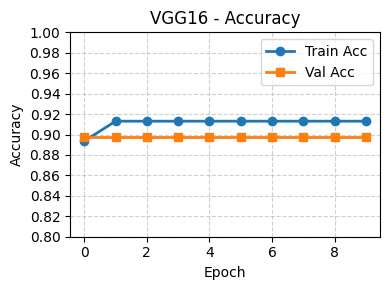

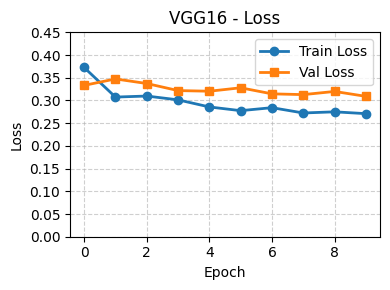

📊 Plotting metrics for model: DenseNet


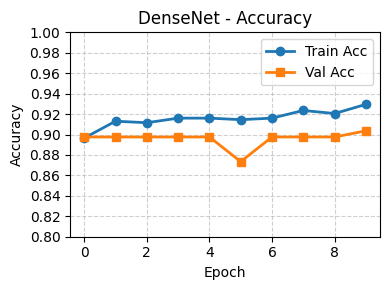

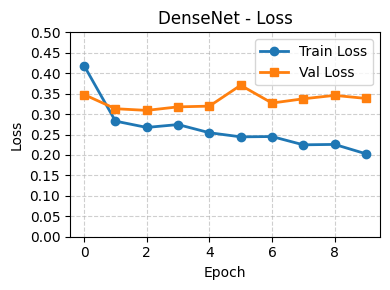

📊 Plotting metrics for model: MobileNet


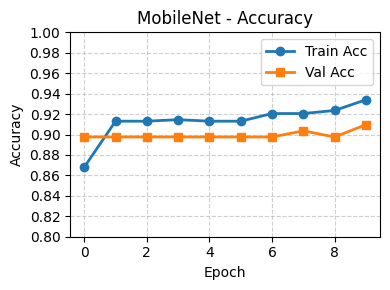

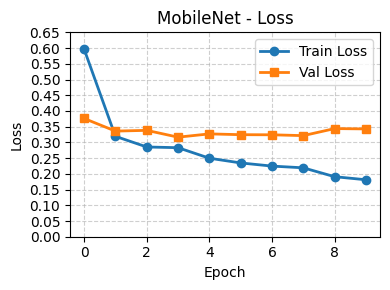

📊 Plotting metrics for model: Xception


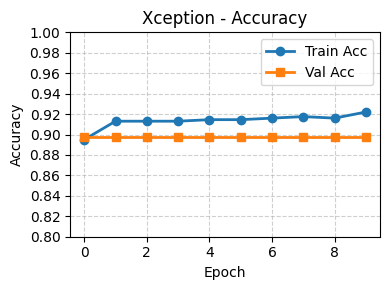

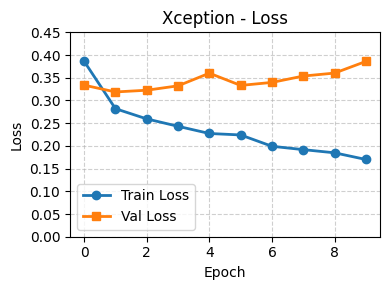

📊 Plotting metrics for model: ResNet


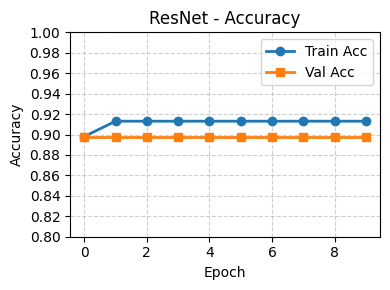

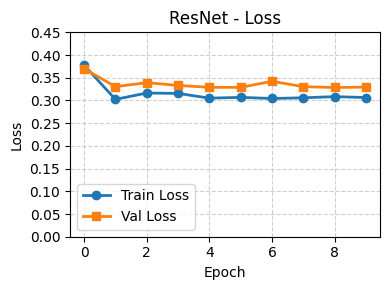

In [ ]:
plot_metrics_separately(histories)

In [ ]:
# # Evaluating Model

# def evaluate_model(name, model, dataset, show_images=True, max_images=20):
#     print(f"\n--- {name} Evaluation ---")
#     loss, acc = model.evaluate(dataset)
#     print(f"{name} - Accuracy: {acc:.2f}, Loss: {loss:.2f}")

#     y_true = []
#     y_pred = []
#     image_samples = []
#     true_labels = []
#     pred_labels = []

#     for images, labels in dataset:
#         preds = model.predict(images)
#         y_true.extend(labels.numpy())
#         y_pred.extend(np.argmax(preds, axis=1))

#         if show_images and len(image_samples) < max_images:
#             image_samples.extend(images.numpy())
#             true_labels.extend(labels.numpy())
#             pred_labels.extend(np.argmax(preds, axis=1))

#     # Classification report
#     print(classification_report(y_true, y_pred, target_names=class_names))

#     # Confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(8,6))
#     sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
#     plt.title(f'{name} - Confusion Matrix')
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.show()

#     # Display sample predictions
#     if show_images:
#         print(f"\nShowing {min(max_images, len(image_samples))} Sample Predictions:")
#         plt.figure(figsize=(15, 10))
#         for i in range(min(max_images, len(image_samples))):
#             plt.subplot(4, 5, i + 1)
#             plt.imshow(image_samples[i].astype("uint8"))
#             plt.axis('off')
#             color = "green" if true_labels[i] == pred_labels[i] else "red"
#             plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}", color=color)
#         plt.tight_layout()
#         plt.show()


In [ ]:
# Saving In Drive

import os
from tensorflow.keras.models import save_model

# ✅ Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

# ✅ Your custom directory path
save_dir = '/content/drive/MyDrive/Trained Models For Children Emotions'
os.makedirs(save_dir, exist_ok=True)

# ✅ Save all models with custom names
for name, model in models_dict.items():
    filename = f"{name}_children_emotion.h5"
    save_path = os.path.join(save_dir, filename)
    model.save(save_path)
    print(f"✅ {name} model saved to: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'models_dict' is not defined

In [ ]:
from tensorflow.keras.models import load_model

model_paths = {
    'VGG16': '/content/drive/MyDrive/Trained Models For Children Emotions/VGG16_children_emotion.h5',
    'DenseNet': '/content/drive/MyDrive/Trained Models For Children Emotions/DenseNet_children_emotion.h5',
    'MobileNet': '/content/drive/MyDrive/Trained Models For Children Emotions/MobileNet_children_emotion.h5',
    'Xception': '/content/drive/MyDrive/Trained Models For Children Emotions/Xception_children_emotion.h5',
    'ResNet': '/content/drive/MyDrive/Trained Models For Children Emotions/ResNet_children_emotion.h5'
}

loaded_models = {}
for name, path in model_paths.items():
    loaded_models[name] = load_model(path)
    print(f"✅ Loaded {name} model from {path}")


✅ Loaded VGG16 model from /content/drive/MyDrive/Trained Models For Children Emotions/VGG16_children_emotion.h5


✅ Loaded DenseNet model from /content/drive/MyDrive/Trained Models For Children Emotions/DenseNet_children_emotion.h5


✅ Loaded MobileNet model from /content/drive/MyDrive/Trained Models For Children Emotions/MobileNet_children_emotion.h5


✅ Loaded Xception model from /content/drive/MyDrive/Trained Models For Children Emotions/Xception_children_emotion.h5


✅ Loaded ResNet model from /content/drive/MyDrive/Trained Models For Children Emotions/ResNet_children_emotion.h5


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(name, model, dataset):
    print(f"\n📌 Evaluating {name} model...")
    loss, acc = model.evaluate(dataset)
    print(f"✅ {name} - Accuracy: {acc:.4f}, Loss: {loss:.4f}")

    y_true = []
    y_pred = []

    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    print("📋 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()



📌 Evaluating VGG16 model...
6/6 ━━━━━━━━━━━━━━━━━━━━ 115s 18s/step - accuracy: 0.8879 - loss: 0.3304
✅ VGG16 - Accuracy: 0.8976, Loss: 0.3091
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
📋 Classification Report:
              precision    recall  f1-score   support

        Test       0.00      0.00      0.00        17
       Train       0.90      1.00      0.95       149

    accuracy                           0.90       166
   macro avg       0.45      0.50      0.47       166
weighted avg       0.81      0.90      0.85       166



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


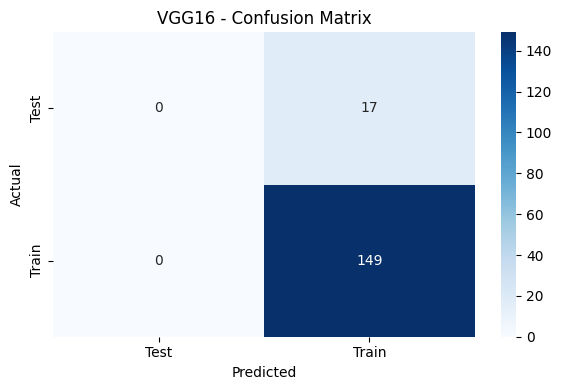


📌 Evaluating DenseNet model...
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8972 - loss: 0.3689
✅ DenseNet - Accuracy: 0.9036, Loss: 0.3383
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
📋 Classification Report:
              precision    recall  f1-score   support

        Test       0.67      0.12      0.20        17
       Train       0.91      0.99      0.95       149

    accuracy                           0.90       166
   macro avg       0.79      0.56      0.57       166
weighted avg       0.88      0.90      0.87       166



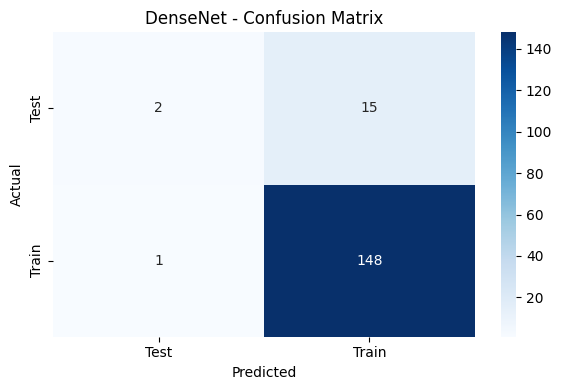


📌 Evaluating MobileNet model...
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9024 - loss: 0.3698
✅ MobileNet - Accuracy: 0.9096, Loss: 0.3429


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
📋 Classification Report:
              precision    recall  f1-score   support

        Test       1.00      0.12      0.21        17
       Train       0.91      1.00      0.95       149

    accuracy                           0.91       166
   macro avg       0.95      0.56      0.58       166
weighted avg       0.92      0.91      0.88       166



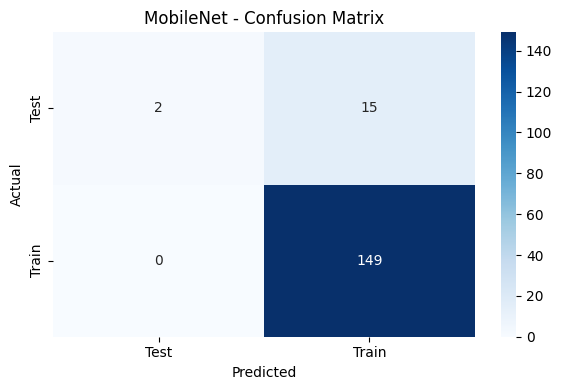


📌 Evaluating Xception model...
6/6 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.8879 - loss: 0.4441
✅ Xception - Accuracy: 0.8976, Loss: 0.3860


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
📋 Classification Report:
              precision    recall  f1-score   support

        Test       0.00      0.00      0.00        17
       Train       0.90      1.00      0.95       149

    accuracy                           0.90       166
   macro avg       0.45      0.50      0.47       166
weighted avg       0.81      0.90      0.85       166



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


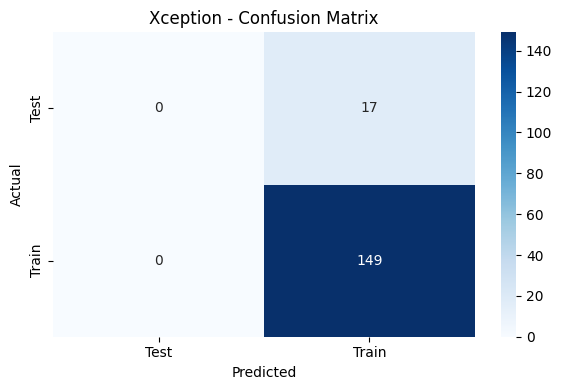


📌 Evaluating ResNet model...
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.8879 - loss: 0.3517
✅ ResNet - Accuracy: 0.8976, Loss: 0.3294
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
📋 Classification Report:
              precision    recall  f1-score   support

        Test       0.00      0.00      0.00        17
       Train       0.90      1.00      0.95       149

    accuracy                           0.90       166
   macro avg       0.45      0.50      0.47       166
weighted avg       0.81      0.90      0.85       166



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


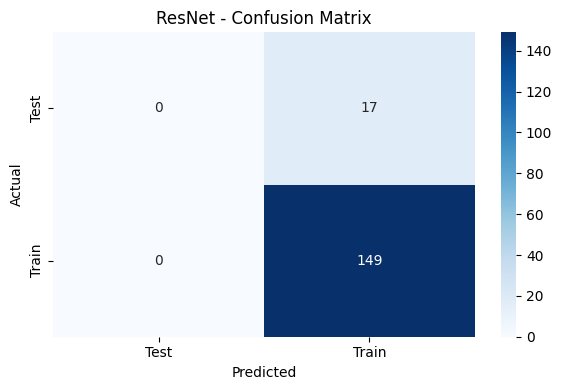

In [ ]:
for name, model in loaded_models.items():
    evaluate_model(name, model, val_ds)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_predictions(model, dataset, class_names, num_images=10):
    plt.figure(figsize=(15, num_images * 2))
    count = 0

    for images, labels in dataset:
        preds = model.predict(images)
        pred_classes = np.argmax(preds, axis=1)
        true_classes = labels.numpy()

        for i in range(len(images)):
            if count >= num_images:
                break
            plt.subplot(num_images, 1, count + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.axis("off")
            plt.title(f"✅ Predicted: {class_names[pred_classes[i]]} | 🎯 Actual: {class_names[true_classes[i]]}",
                      color="green" if pred_classes[i] == true_classes[i] else "red")
            count += 1

        if count >= num_images:
            break

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step


/tmp/ipython-input-20-2975961452.py:26: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-20-2975961452.py:26: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


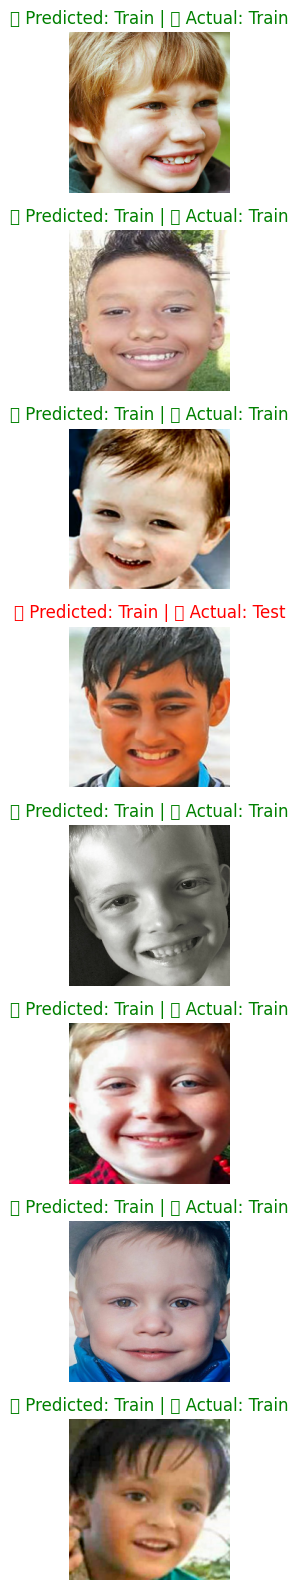

In [ ]:
# Suppose you've already loaded your model:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Trained Models For Children Emotions/VGG16_children_emotion.h5")

# Show predictions
show_predictions(model, val_ds, class_names, num_images=8)



🔍 Evaluating VGG16...
VGG16 Accuracy: 0.8976

🔍 Evaluating DenseNet...
DenseNet Accuracy: 0.9036

🔍 Evaluating MobileNet...
MobileNet Accuracy: 0.9096

🔍 Evaluating Xception...
Xception Accuracy: 0.8976

🔍 Evaluating ResNet...
ResNet Accuracy: 0.8976


/tmp/ipython-input-9-2696207334.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


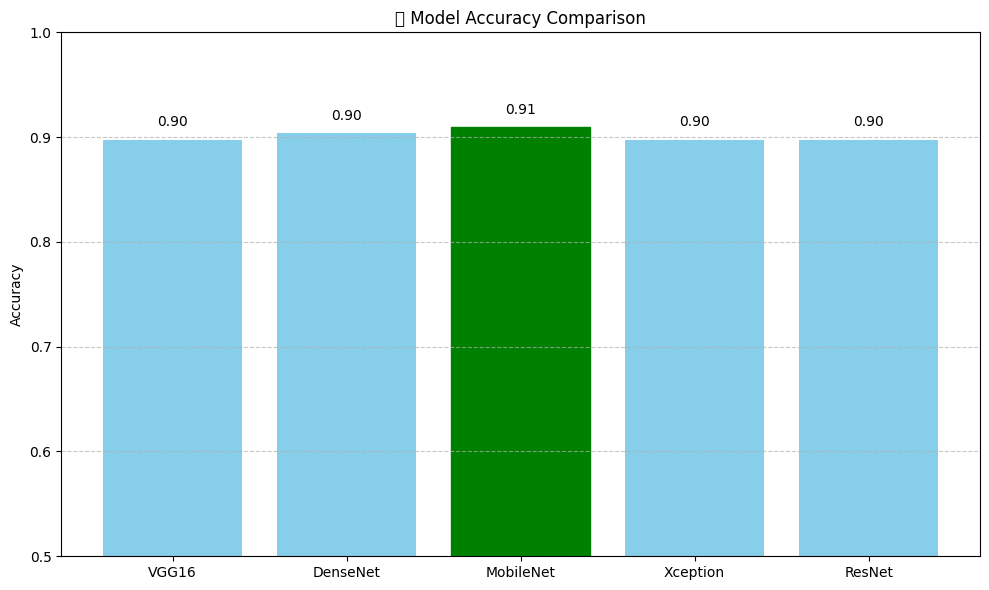

In [ ]:
import matplotlib.pyplot as plt

# 1. Evaluate models and collect accuracy
accuracies = {}
for name, model in loaded_models.items():
    print(f"\n🔍 Evaluating {name}...")
    loss, acc = model.evaluate(val_ds, verbose=0)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# 2. Plotting bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')

# Highlight the best accuracy
best_model = max(accuracies, key=accuracies.get)
best_index = list(accuracies.keys()).index(best_model)
bars[best_index].set_color('green')

# Annotate accuracy values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.title("📊 Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)  # adjust as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
